# 케라스 보스턴 주택 가격 모델

### 모듈로딩

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### 데이터 로드
- 데이터의 수가 상당히 적기 때문에 테스트 데이터의 비율을 20%로 지정

- 13개의 특성을 가짐

- 각각의 특성이 모두 다른 스케일, 즉 단위가 모두 다름
  - 범죄율: 0~1 사이의 값
  - 방의 개수 3~9 사이의 값

- 정답 레이블은 주택 가격의 중간가격($1000 단위)

In [2]:
tf.random.set_seed(111)

(x_train_full, y_train_full),(x_test,y_test) = load_data(path='boston_housing.npz',
                                                         test_split=0.2,
                                                         seed=111)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step


### 데이터 확인

In [4]:
print('학습데이터: {}\t 레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('테스트 데이터: {}\t 레이블: {}'.format(x_test.shape, y_test.shape))

학습데이터: (404, 13)	 레이블: (404,)
테스트 데이터: (102, 13)	 레이블: (102,)


In [6]:
print(x_train_full[0])

[2.8750e-02 2.8000e+01 1.5040e+01 0.0000e+00 4.6400e-01 6.2110e+00
 2.8900e+01 3.6659e+00 4.0000e+00 2.7000e+02 1.8200e+01 3.9633e+02
 6.2100e+00]


In [8]:
print(y_train_full[0])

25.0


### 데이터 전처리
- Standardization

- 특성의 단위가 모두 다르기 때문에 **동일한 범위로 조정**

In [9]:
mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

x_train, x_val, y_train, y_val = train_test_split(x_train_preprocessed, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)

In [10]:
print('학습데이터: {}\t 레이블:{}'.format(x_train_full.shape, y_train_full.shape))
print('학습데이터: {}\t 레이블:{}'.format(x_train.shape, y_train.shape))
print('검증데이터: {}\t 레이블:{}'.format(x_val.shape, y_val.shape))
print('테스트데이터: {}\t 레이블:{}'.format(x_test.shape, y_test.shape))

학습데이터: (404, 13)	 레이블:(404,)
학습데이터: (282, 13)	 레이블:(282,)
검증데이터: (122, 13)	 레이블:(122,)
테스트데이터: (102, 13)	 레이블:(102,)


### 모델 구성
- 학습 데이터가 매우 적은 경우에 모델의 깊이를 깊게 할수록  
  과대적합(Overfitting)이 일어날 확률이 높음

In [12]:
model = Sequential([Dense(100, activation='relu', input_shape=(13,), name='dense1'),
                    Dense(64, activation='relu', name='dense2'),
                    Dense(32, activation='relu', name='dense3'),
                    Dense(1, activation='relu', name='output')])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense1 (Dense)                  │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,977 (38.97 KB)

 Trainable params: 9,977 (38.97 KB)

 Non-trainable params: 0 (0.00 B)

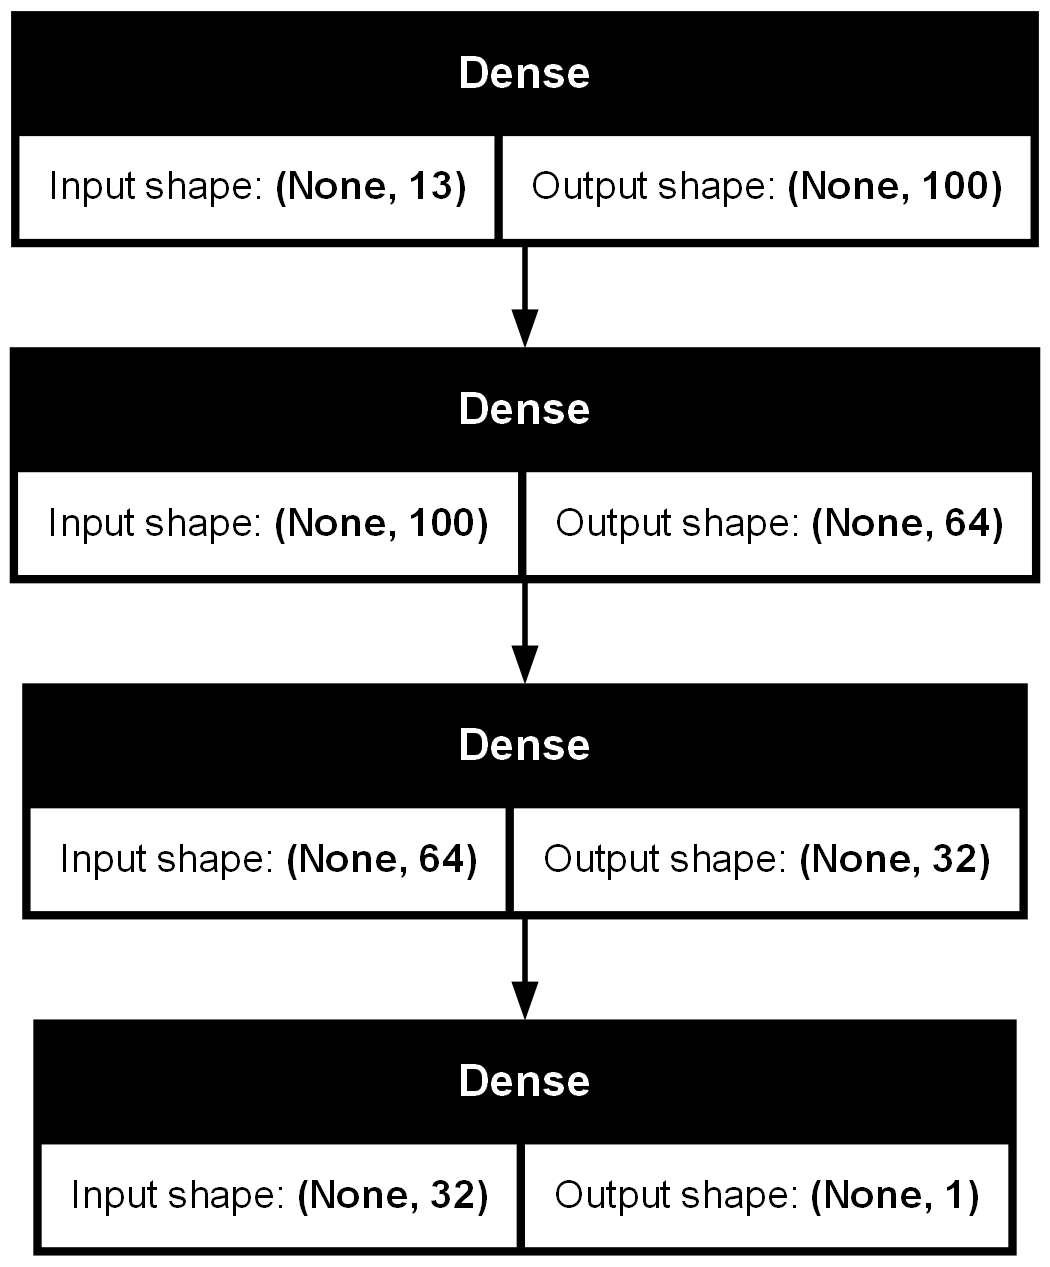

In [15]:
plot_model(model,show_shapes=True)

### 모델 컴파일(compile)

- 회귀 문제에서는 주로 평균제곱오차(MSE, Mean Squared Error)를 손실함수로,  
  평균절대오차(MAE, Mean Absolute Error)를 평가지표로 많이 사용!

In [16]:
model.compile(loss='mse',
              optimizer=Adam(learning_rate=1e-2),
              metrics=['mae'])

### 모델 학습

In [17]:
history = model.fit(x_train,y_train,epochs=300, validation_data=(x_val,y_val))

Epoch 1/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 415.9964 - mae: 18.2741 - val_loss: 145.6545 - val_mae: 9.5872
Epoch 2/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124.5387 - mae: 8.6034 - val_loss: 73.1540 - val_mae: 6.9570
Epoch 3/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41.8142 - mae: 5.1241 - val_loss: 33.0945 - val_mae: 4.5960
Epoch 4/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.3867 - mae: 4.1106 - val_loss: 18.4854 - val_mae: 3.2276
Epoch 5/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.0364 - mae: 3.5245 - val_loss: 14.4650 - val_mae: 3.0189
Epoch 6/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.0890 - mae: 2.9761 - val_loss: 14.3004 - val_mae: 2.9080
Epoch 7/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.4405 - mae: 2.6765 - val_loss: 12.5687 - val_mae: 2.6794
Epoch 8/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.2288 - mae: 2.4515 - val_loss: 10.5457 - val_mae: 2.4760
Epoch 9/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10

### 모델 평가
- `evaluate()`

In [18]:
model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.1746 - mae: 2.4786


[16.544015884399414, 2.8110082149505615]

In [19]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


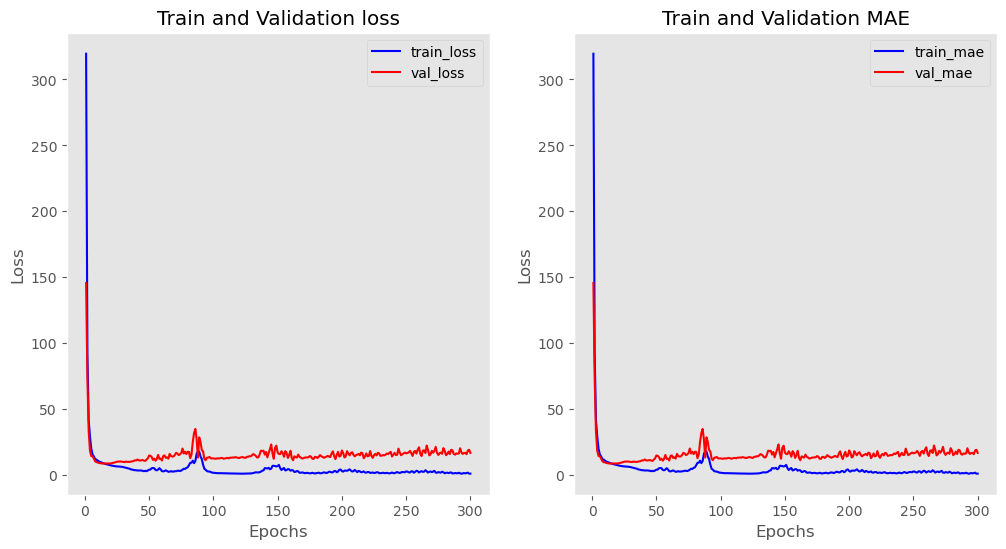

In [21]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue', label='train_loss')
ax1.plot(epochs,val_loss,color='red',label='val_loss')
ax1.set_title('Train and Validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,loss,color='blue', label='train_mae')
ax2.plot(epochs,val_loss,color='red',label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()


### K-Fold 교차 검증

- 데이터셋의 크기가 매우 작은 경우에  
  [훈련, 검증, 테스트] 데이터로 나누게 되면 과소적합이 일어날 확률이 높음

- 이를 해결하기 위해 K-Fold 교차 검증 실행
  <br>

  <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="600">

  <sub>출처: https://scikit-learn.org/stable/modules/cross_validation.html</sub>

### 모델 재구성

In [30]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold


In [23]:
tf.random.set_seed(111)

(x_train_full, y_train_full),(x_test,y_test) = load_data(path='boston_housing.npz',
                                                         test_split=0.2,
                                                         seed=111)

mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

In [25]:
k = 3

kfold = KFold(n_splits=k, shuffle=True, random_state=111)

In [33]:
def build_model():
    input = Input(shape=(13,), name='input')
    hidden1 = Dense(100, activation='relu', name='dense1')(input)
    hidden2 =  Dense(64, activation='relu', name='dense2')(hidden1)
    hidden3 =  Dense(32, activation='relu', name='dense3')(hidden2)
    output =  Dense(1,name='output')(hidden3)

    model = Model(inputs=[input], outputs=output)

    model.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae'])
    
    return model

In [34]:
mae_lost = []

In [36]:
for train_idx, val_idx in kfold.split(x_train):
    x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
    y_train_fold, y_val_fold = y_train_full[train_idx], y_train_full[val_idx]

    model = build_model()

    model.fit(x_train_fold,y_train_fold, epochs=300,
              validation_data = (x_val_fold, y_val_fold))
    
    #loss, mae = model.evaluate(x_test,y_test)에서 loss는 무시하고 MAE만 사용하려면 
    # -, <= loss는 무시하고 mae만 test_mae변수에 저장됨 
    _, test_mae = model.evaluate(x_test,y_test)
    
    mae_lost.append(test_mae)



Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 576.7814 - mae: 22.1967 - val_loss: 565.3821 - val_mae: 21.8958
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 544.4700 - mae: 21.4539 - val_loss: 530.3600 - val_mae: 21.0792
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 509.2936 - mae: 20.6129 - val_loss: 485.9155 - val_mae: 19.9879
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 463.8930 - mae: 19.4720 - val_loss: 428.1024 - val_mae: 18.4671
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 404.1446 - mae: 17.8505 - val_loss: 354.4928 - val_mae: 16.3734
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 328.9261 - mae: 15.5944 - val_loss: 268.9764 - val_mae: 13.6176
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 243.3915 - mae: 12.7851 - val_loss: 186.0962 - val_mae: 10.8961
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 165.2874 - mae: 9.8724 - val_loss: 133.8915 - val_mae: 8.7831
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━

In [38]:
print(mae_lost)

[9.617919921875, 7.898598670959473, 9.777665138244629]


In [39]:
print(np.mean(mae_lost))

9.098061243693033
